<h1><b>Problem statement</b></h1>
    In this project we will be building a model that Predicts customer churn

<h3>About Data:</h3>

    Dependent Feature : 
        Churn (Binary 'yes' and 'no')

    Independent Features : 
        1. "State" (letter code of the US state of customer residence)
        2. "account_length" (NUmber of months the customer has been with the current telco provider)
        3. "area_code" (string="area_code_AAA" where AAA = 3 digit area code.)
        4. "international_plan", (yes/no). The customer has international plan.
        5. "voice_mail_plan", (yes/no). The customer has voice mail plan.
        6."number_vmail_messages", numerical. Number of voice-mail messages.
        7."total_day_minutes", numerical. Total minutes of day calls.
        8."total_day_calls", numerical. Total minutes of day calls.
        9."total_day_charge", numerical. Total charge of day calls.
        10."total_eve_minutes", numerical. Total minutes of evening calls.
        11."total_eve_calls", numerical. Total number of evening calls.
        12."total_eve_charge", numerical. Total charge of evening calls.
        13."total_night_minutes", numerical. Total minutes of night calls.
        14."total_night_calls", numerical. Total number of night calls.
        15."total_night_charge", numerical. Total charge of night calls.
        16."total_intl_minutes", numerical. Total minutes of international calls.
        17."total_intl_calls", numerical. Total number of international calls.
        18."total_intl_charge", numerical. Total charge of international calls
        19."number_customer_service_calls", numerical. Number of calls to customer service

In [109]:
import pandas as pd
import numpy as np

In [110]:
try: 
    df = pd.read_csv('../data/raw_data.csv')

except Exception:
    df = pd.read_csv('https://raw.githubusercontent.com/soil15/Customer_churn/main/data/raw_data.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(5000, 20)

In [111]:
df['account_length'].value_counts()

90     65
87     59
105    57
93     57
112    56
       ..
208     1
216     1
221     1
233     1
243     1
Name: account_length, Length: 218, dtype: int64

In [112]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [113]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [114]:
df['state'].head()

0    OH
1    NJ
2    OH
3    OK
4    MA
Name: state, dtype: object

In [115]:
num_cols = [col for col in df.columns if df[col].dtypes != 'object']
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']

In [116]:
num_cols

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [117]:
cat_cols

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

#### Checking for null values

In [118]:
df.isnull().sum()

state                              0
account_length                     0
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages              0
total_day_minutes                  0
total_day_calls                    0
total_day_charge                   0
total_eve_minutes                  0
total_eve_calls                    0
total_eve_charge                   0
total_night_minutes                0
total_night_calls                  0
total_night_charge                 0
total_intl_minutes                 0
total_intl_calls                   0
total_intl_charge                  0
number_customer_service_calls      0
churn                            750
dtype: int64

In [119]:
df.dropna(inplace=True)

In [120]:
df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

<h4>Statewise churning data</h4>

top 5 states which have highest customer churning rate.

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
state_df = df[['churn', 'state']]

state_df[state_df['churn'] == 'yes'].groupby('state').count().reset_index().sort_values(by='churn', ascending=False).head()

,state,churn
31,NJ,26
43,TX,19
23,MN,19
49,WV,19
20,MD,19


In [123]:
new_df = state_df[state_df['churn'] == 'yes'].groupby('state').count().reset_index().sort_values(by='churn', ascending=False).head()

new_df.head()

,state,churn
31,NJ,26
43,TX,19
23,MN,19
49,WV,19
20,MD,19


In [124]:
list(new_df['state'].values)

['NJ', 'TX', 'MN', 'WV', 'MD']

<h4>These are the top 5 states with highest chruning rate ['NJ', 'TX', 'MN', 'WV', 'MD']</h4>

In [125]:
df['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

<AxesSubplot:xlabel='area_code', ylabel='count'>

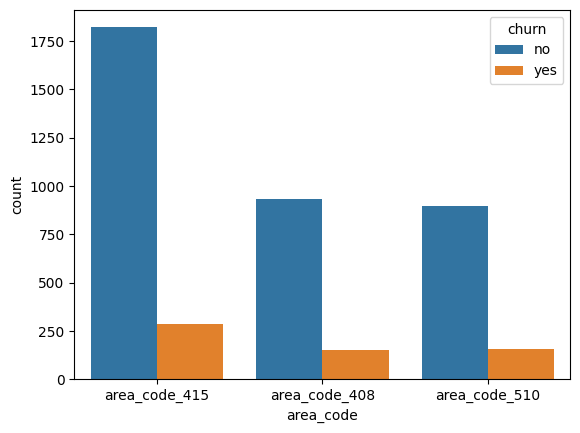

In [126]:
sns.countplot(data=df, x='area_code', hue='churn')

<h4>area_code_415 as of now is the highest has the highest churning rate than other area codes</h4>

In [127]:
df['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [128]:
df['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

In [129]:
num_cols

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

#### Conclusion : 
    1. Dataset is imbalanced (Need to use tree based approach)